### Q1. Read the given CSV file in a Hive table


```
start-all.sh
jps
hive
hive> show databases;
hive> use pga17;
hive> create table boston ( CRIM double, ZN double, INDUS double, 
    > CHAS bigint, NOX double, RM double, 
    > AGE double, DIS double, RAD double,
    > TAX double, PT double, B double, 
    > LSTAT double, MV double
    > ) row format delimited 
    > fields terminated by ',' 
    > stored as textfile;
OK
Time taken: 1.23 seconds

hive> load data local inpath 'Downloads/boston.csv' overwrite into table boston;
Loading data to table pga17.boston
OK
Time taken: 1.597 seconds
hive> select * from boston;
OK

0.00632	18.0	2.309999943	0	0.537999988	6.574999809	65.19999695	4.090000153	1.0	296.0	15.30000019	396.8999939	4.980000019	24.0
0.027310001	0.0	7.070000172	0	0.469000012	6.421000004	78.90000153	4.967100143	2.0	242.0	17.79999924	396.8999939	9.140000343	21.60000038
0.02729	0.0	7.070000172	0	0.469000012	7.184999943	61.09999847	4.967100143	2.0	242.0	17.79999924	392.8299866	4.03000021	34.70000076
0.032370001	0.0	2.180000067	0	0.458000004	6.998000145	45.79999924	6.062200069	3.0	222.0	18.70000076	394.6300049	2.940000057	33.40000153
0.069049999	0.0	2.180000067	0	0.458000004	7.146999836	54.20000076	6.062200069	3.0	222.0	18.70000076	396.8999939	5.329999924	36.20000076
0.029850001	0.0	2.180000067	0	0.458000004	6.429999828	58.70000076	6.062200069	3.0	222.0	18.70000076	394.1199951	5.210000038	28.70000076
0.088289998	12.5	7.869999886	0	0.523999989	6.012000084	66.59999847	5.560500145	5.0	311.0	15.19999981	395.6000061	12.43000031	22.89999962
0.144549996	12.5	7.869999886	0	0.523999989	6.171999931	96.09999847	5.950500011	5.0	311.0	15.19999981	396.8999939	19.14999962	27.10000038
0.211239994	12.5	7.869999886	0	0.523999989	5.631000042	100.0	6.082099915	5.0	311.0	15.19999981	386.6300049	29.93000031	16.5

```


### **Perform the following tasks using PySpark**

### Q2. Read the data from Hive table as spark dataframe



```
ubh01@ubh01:~$ pyspark
>>>from pyspark.sql.types import StructType, StringType, IntegerType, DoubleType, LongType
>>> schema = StructType() \
...       .add("CRIM",DoubleType(),True) \
...       .add("ZN",DoubleType(),True) \
...       .add("INDUS",DoubleType(),True) \
...       .add("CHAS",LongType(),True) \
...       .add("NOX",DoubleType(),True) \
...       .add("RM",DoubleType(),True) \
...       .add("AGE",DoubleType(),True) \
...       .add("DIS",LongType(),True) \
...       .add("RAD",DoubleType(),True) \
...       .add("TAX",DoubleType(),True) \
...       .add("PT",DoubleType(),True) \
...       .add("B",DoubleType(),True) \
...       .add("LSTAT",DoubleType(),True) \
...       .add("MV",DoubleType(),True)
>>> df_with_schema = spark.read.format("csv").option("header","False").schema(schema).load("hdfs://localhost:9000/user/ubh01/pga17/boston.csv")
>>> df_with_schema.printSchema()
root
 |-- CRIM: double (nullable = true)
 |-- ZN: double (nullable = true)
 |-- INDUS: double (nullable = true)
 |-- CHAS: long (nullable = true)
 |-- NOX: double (nullable = true)
 |-- RM: double (nullable = true)
 |-- AGE: double (nullable = true)
 |-- DIS: long (nullable = true)
 |-- RAD: double (nullable = true)
 |-- TAX: double (nullable = true)
 |-- PT: double (nullable = true)
 |-- B: double (nullable = true)
 |-- LSTAT: double (nullable = true)
 |-- MV: double (nullable = true)

>>> df_with_schema.show()
-----------+----+-----------+----+-----------+-----------+-----------+----+----+-----+-----------+-----------+-----------+-----------+
|       CRIM|  ZN|      INDUS|CHAS|        NOX|         RM|        AGE| DIS| RAD|  TAX|         PT|          B|      LSTAT|         MV|
+-----------+----+-----------+----+-----------+-----------+-----------+----+----+-----+-----------+-----------+-----------+-----------+
|       null|null|       null|null|       null|       null|       null|null|null| null|       null|       null|       null|       null|
|    0.00632|18.0|2.309999943|   0|0.537999988|6.574999809|65.19999695|null| 1.0|296.0|15.30000019|396.8999939|4.980000019|       24.0|
|0.027310001| 0.0|7.070000172|   0|0.469000012|6.421000004|78.90000153|null| 2.0|242.0|17.79999924|396.8999939|9.140000343|21.60000038|
|    0.02729| 0.0|7.070000172|   0|0.469000012|7.184999943|61.09999847|null| 2.0|242.0|17.79999924|392.8299866| 4.03000021|34.70000076|
|0.032370001| 0.0|2.180000067|   0|0.458000004|6.998000145|45.79999924|null| 3.0|222.0|18.70000076|394.6300049|2.940000057|33.40000153|
|0.069049999| 0.0|2.180000067|   0|0.458000004|7.146999836|54.20000076|null| 3.0|222.0|18.70000076|396.8999939|5.329999924|36.20000076|
|0.029850001| 0.0|2.180000067|   0|0.458000004|6.429999828|58.70000076|null| 3.0|222.0|18.70000076|394.1199951|5.210000038|28.70000076|
|0.088289998|12.5|7.869999886|   0|0.523999989|6.012000084|66.59999847|null| 5.0|311.0|15.19999981|395.6000061|12.43000031|22.89999962|
|0.144549996|12.5|7.869999886|   0|0.523999989|6.171999931|96.09999847|null| 5.0|311.0|15.19999981|396.8999939|19.14999962|27.10000038|
|0.211239994|12.5|7.869999886|   0|0.523999989|5.631000042|      100.0|null| 5.0|311.0|15.19999981|386.6300049|29.93000031|       16.5|
|0.170039997|12.5|7.869999886|   0|0.523999989|6.004000187|85.90000153|null| 5.0|311.0|15.19999981|386.7099915|17.10000038|18.89999962|
|0.224889994|12.5|7.869999886|   0|0.523999989|6.376999855|94.30000305|null| 5.0|311.0|15.19999981| 392.519989|20.45000076|       15.0|
|0.117470004|12.5|7.869999886|   0|0.523999989|6.008999825|82.90000153|null| 5.0|311.0|15.19999981|396.8999939|13.27000046|18.89999962|
|0.093780003|12.5|7.869999886|   0|0.523999989|5.888999939|       39.0|null| 5.0|311.0|15.19999981|      390.5|15.71000004|21.70000076|
|0.629760027| 0.0|8.140000343|   0|0.537999988|5.948999882|61.79999924|null| 4.0|307.0|       21.0|396.8999939|8.260000229|20.39999962|
|0.637960017| 0.0|8.140000343|   0|0.537999988|6.096000195|       84.5|null| 4.0|307.0|       21.0| 380.019989|10.26000023|18.20000076|
|0.627390027| 0.0|8.140000343|   0|0.537999988|5.834000111|       56.5|null| 4.0|307.0|       21.0|395.6199951|8.470000267|19.89999962|
|1.053930044| 0.0|8.140000343|   0|0.537999988|5.934999943|29.29999924|null| 4.0|307.0|       21.0|386.8500061|6.579999924|23.10000038|
|0.784200013| 0.0|8.140000343|   0|0.537999988|5.989999771|81.69999695|null| 4.0|307.0|       21.0|     386.75|14.67000008|       17.5|
|0.802709997| 0.0|8.140000343|   0|0.537999988|5.455999851|36.59999847|null| 4.0|307.0|       21.0|288.9899902|11.68999958|20.20000076|
+-----------+----+-----------+----+-----------+-----------+-----------+----+----+-----+-----------+-----------+-----------+-----------+
only showing top 20 rows

```



### Q3. Get the correlation between dependent and independent variables

In [1]:
!pip install pyspark

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 281.4 MB 41 kB/s 
     |████████████████████████████████| 199 kB 62.4 MB/s 
  Created wheel for pyspark: filename=pyspark-3.3.1-py2.py3-none-any.whl size=281845513 sha256=c74b13d694da7f47e0630740d70dee9ea32b69ebc9c1932c26cb938137b31d26
  Stored in directory: /root/.cache/pip/wheels/42/59/f5/79a5bf931714dcd201b26025347785f087370a10a3329a899c
Successfully built pyspark


In [2]:
from pyspark import SparkConf, SparkContext
from pyspark.sql import SQLContext

In [3]:
sc = SparkContext()
print(sc)

<SparkContext master=local[*] appName=pyspark-shell>


In [4]:
sqlContext = SQLContext(sc)

/usr/local/lib/python3.7/dist-packages/pyspark/sql/context.py:114: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  FutureWarning,


In [5]:
boston_df = sqlContext.read.format('com.databricks.spark.csv').options(header='true', inferschema='true').load('/content/sample_data/boston.csv')

In [6]:
boston_df.count()

506

In [7]:
boston_df.printSchema()

root
 |-- CRIM: double (nullable = true)
 |-- ZN: double (nullable = true)
 |-- INDUS: double (nullable = true)
 |-- CHAS: integer (nullable = true)
 |-- NOX: double (nullable = true)
 |-- RM: double (nullable = true)
 |-- AGE: double (nullable = true)
 |-- DIS: double (nullable = true)
 |-- RAD: integer (nullable = true)
 |-- TAX: integer (nullable = true)
 |-- PT: double (nullable = true)
 |-- B: double (nullable = true)
 |-- LSTAT: double (nullable = true)
 |-- MV: double (nullable = true)



In [8]:
boston_df.show()

+-----------+----+-----------+----+-----------+-----------+-----------+-----------+---+---+-----------+-----------+-----------+-----------+
|       CRIM|  ZN|      INDUS|CHAS|        NOX|         RM|        AGE|        DIS|RAD|TAX|         PT|          B|      LSTAT|         MV|
+-----------+----+-----------+----+-----------+-----------+-----------+-----------+---+---+-----------+-----------+-----------+-----------+
|    0.00632|18.0|2.309999943|   0|0.537999988|6.574999809|65.19999695|4.090000153|  1|296|15.30000019|396.8999939|4.980000019|       24.0|
|0.027310001| 0.0|7.070000172|   0|0.469000012|6.421000004|78.90000153|4.967100143|  2|242|17.79999924|396.8999939|9.140000343|21.60000038|
|    0.02729| 0.0|7.070000172|   0|0.469000012|7.184999943|61.09999847|4.967100143|  2|242|17.79999924|392.8299866| 4.03000021|34.70000076|
|0.032370001| 0.0|2.180000067|   0|0.458000004|6.998000145|45.79999924|6.062200069|  3|222|18.70000076|394.6300049|2.940000057|33.40000153|
|0.069049999| 0.0|2.

In [9]:
boston_df.cache()

DataFrame[CRIM: double, ZN: double, INDUS: double, CHAS: int, NOX: double, RM: double, AGE: double, DIS: double, RAD: int, TAX: int, PT: double, B: double, LSTAT: double, MV: double]

In [10]:
boston_df.describe().toPandas().transpose()

,0,1,2,3,4
summary,count,mean,stddev,min,max
CRIM,506,3.6135235608162057,8.601545086715594,0.00632,88.97619629
ZN,506,11.363636363636363,23.32245299451514,0.0,100.0
INDUS,506,11.136778749531626,6.86035298095724,0.460000008,27.73999977
CHAS,506,0.0691699604743083,0.2539940413404101,0,1
NOX,506,0.5546950602312246,0.1158776754570543,0.38499999,0.870999992
RM,506,6.28463438896641,0.7026171549511354,3.561000109,8.779999733
AGE,506,68.57490120115612,28.148861532793276,2.900000095,100.0
DIS,506,3.7950426960059325,2.105710142043288,1.129600048,12.12650013
RAD,506,9.549407114624506,8.707259384239366,1,24


In [11]:
import pandas as pd

In [12]:
print(boston_df.dtypes)

[('CRIM', 'double'), ('ZN', 'double'), ('INDUS', 'double'), ('CHAS', 'int'), ('NOX', 'double'), ('RM', 'double'), ('AGE', 'double'), ('DIS', 'double'), ('RAD', 'int'), ('TAX', 'int'), ('PT', 'double'), ('B', 'double'), ('LSTAT', 'double'), ('MV', 'double')]


In [13]:
numeric_features = [t[0] for t in boston_df.dtypes if t[1] == 'int' or t[1] == 'double']
print(numeric_features)

['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PT', 'B', 'LSTAT', 'MV']


In [14]:
sampled_data = boston_df.select(numeric_features).sample(False, 0.8).toPandas()

In [15]:
from pandas.plotting import scatter_matrix

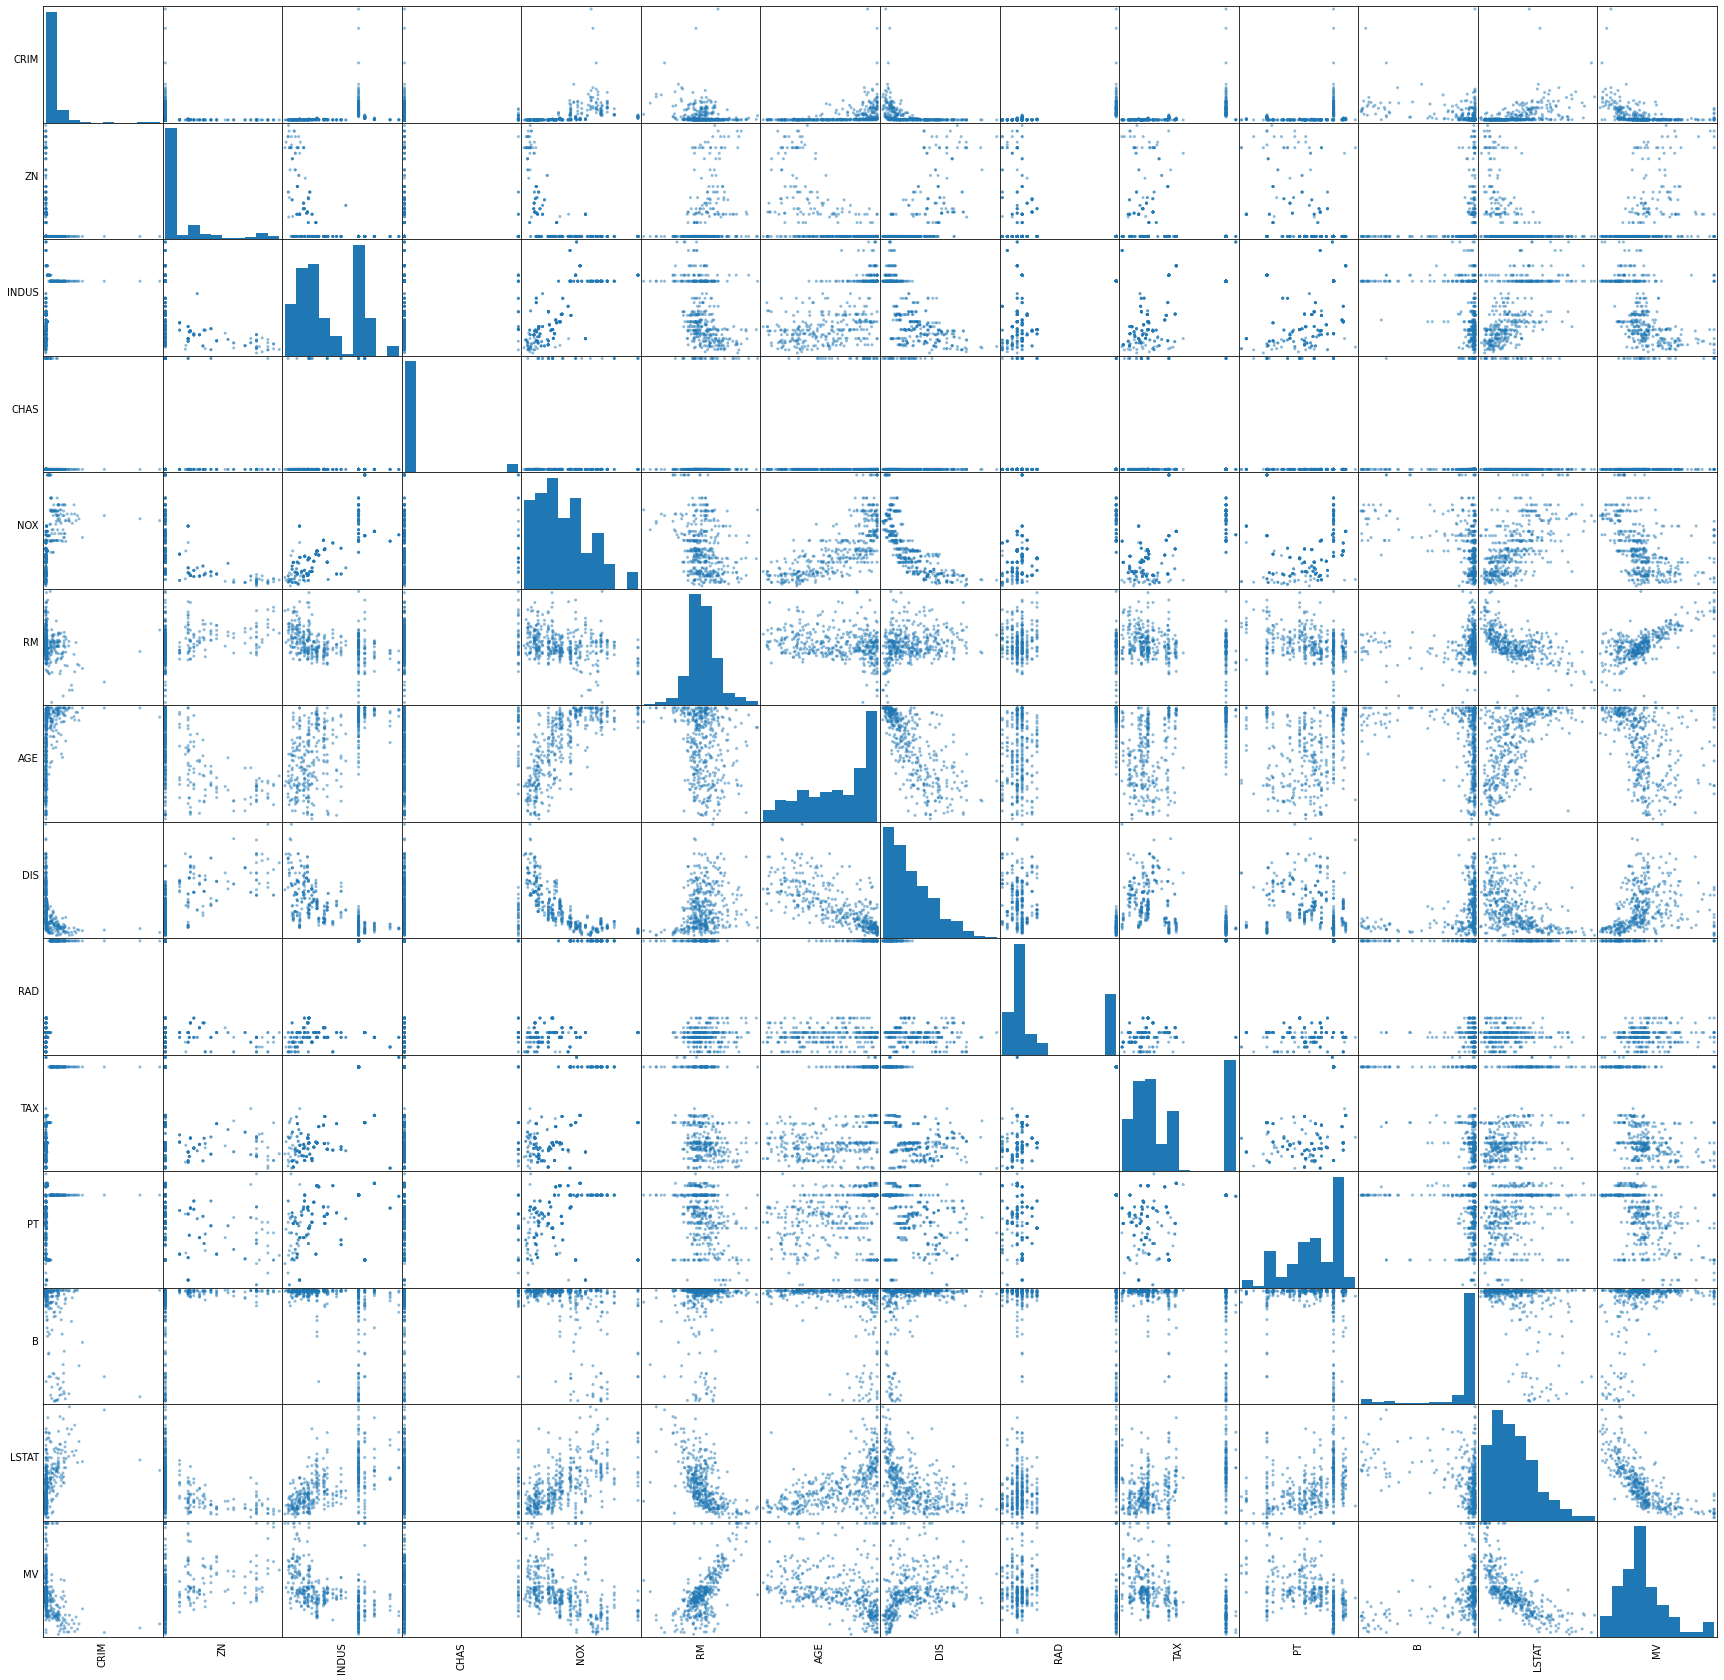

In [16]:
axs = scatter_matrix(sampled_data, figsize=(30, 30))
n = len(sampled_data.columns)
for i in range(n):
    v = axs[i, 0]
    v.yaxis.label.set_rotation(0)
    v.yaxis.label.set_ha('right')
    v.set_yticks(())
    h = axs[n-1, i]
    h.xaxis.label.set_rotation(90)
    h.set_xticks(())

In [17]:
import six
for i in boston_df.columns:
    if not( isinstance(boston_df.select(i).take(1)[0][0], six.string_types)):
        print( "Correlation to median value of homes for ", i, boston_df.stat.corr('MV',i))

Correlation to median value of homes for  CRIM -0.3883046116575088
Correlation to median value of homes for  ZN 0.36044534463752903
Correlation to median value of homes for  INDUS -0.48372517128143383
Correlation to median value of homes for  CHAS 0.17526017775291847
Correlation to median value of homes for  NOX -0.4273207763683772
Correlation to median value of homes for  RM 0.695359937127267
Correlation to median value of homes for  AGE -0.37695456714288667
Correlation to median value of homes for  DIS 0.24992873873512172
Correlation to median value of homes for  RAD -0.3816262315669168
Correlation to median value of homes for  TAX -0.46853593528654536
Correlation to median value of homes for  PT -0.5077867038116085
Correlation to median value of homes for  B 0.3334608226834164
Correlation to median value of homes for  LSTAT -0.7376627294671615
Correlation to median value of homes for  MV 1.0


### **Q4. Build a linear regression model to predict house price**

In [18]:
from pyspark.ml.feature import VectorAssembler
vectorAssembler = VectorAssembler(inputCols = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM','AGE', 'DIS', 'RAD', 'TAX', 'PT', 'B', 'LSTAT'], outputCol = 'features')
vhouse_df = vectorAssembler.transform(boston_df)
vhouse_df = vhouse_df.select(['features', 'MV'])
vhouse_df.show()

+--------------------+-----------+
|            features|         MV|
+--------------------+-----------+
|[0.00632,18.0,2.3...|       24.0|
|[0.027310001,0.0,...|21.60000038|
|[0.02729,0.0,7.07...|34.70000076|
|[0.032370001,0.0,...|33.40000153|
|[0.069049999,0.0,...|36.20000076|
|[0.029850001,0.0,...|28.70000076|
|[0.088289998,12.5...|22.89999962|
|[0.144549996,12.5...|27.10000038|
|[0.211239994,12.5...|       16.5|
|[0.170039997,12.5...|18.89999962|
|[0.224889994,12.5...|       15.0|
|[0.117470004,12.5...|18.89999962|
|[0.093780003,12.5...|21.70000076|
|[0.629760027,0.0,...|20.39999962|
|[0.637960017,0.0,...|18.20000076|
|[0.627390027,0.0,...|19.89999962|
|[1.053930044,0.0,...|23.10000038|
|[0.784200013,0.0,...|       17.5|
|[0.802709997,0.0,...|20.20000076|
|[0.725799978,0.0,...|18.20000076|
+--------------------+-----------+
only showing top 20 rows



In [19]:
splits = vhouse_df.randomSplit([0.7, 0.3])
train_df = splits[0]
test_df = splits[1]

### **Q5. Evaluate the Linear Regression model by getting the RMSE and R-squared values**

In [20]:
from pyspark.ml.regression import LinearRegression
lr = LinearRegression(featuresCol = 'features', labelCol='MV', maxIter=10, regParam=0.3, elasticNetParam=0.8)
lr_model = lr.fit(train_df)
print("Coefficients: " + str(lr_model.coefficients))
print("Intercept: " + str(lr_model.intercept))

Coefficients: [-0.037766130954947574,0.009713046019243117,0.0,0.7700414039411764,-7.22672252046471,3.984531056327656,0.0,-0.7185078388410927,0.0,-0.0003912405220504745,-0.8475472876122987,0.007429505791816982,-0.5339934595411715]
Intercept: 23.870537858762567


In [21]:
trainingSummary = lr_model.summary
print("RMSE: %f" % trainingSummary.rootMeanSquaredError)
print("r2: %f" % trainingSummary.r2)

RMSE: 4.788836
r2: 0.712536


In [22]:
train_df.describe().show()

+-------+------------------+
|summary|                MV|
+-------+------------------+
|  count|               376|
|   mean|22.317553230984043|
| stddev|  8.94368817664828|
|    min|       5.599999905|
|    max|              50.0|
+-------+------------------+



In [23]:
lr_predictions = lr_model.transform(test_df)
lr_predictions.select("prediction","MV","features").show()

+------------------+-----------+--------------------+
|        prediction|         MV|            features|
+------------------+-----------+--------------------+
|30.622953648151274|       24.0|[0.00632,18.0,2.3...|
|30.507432523779467|32.20000076|[0.00906,90.0,2.9...|
|16.816131336685892|18.89999962|[0.0136,75.0,4.0,...|
|   37.955672272292|       50.0|[0.01381,80.0,0.4...|
| 39.60428067005783|       50.0|[0.01501,90.0,1.2...|
| 34.68309081404526|       44.0|[0.01538,90.0,3.7...|
| 25.63664093685345|23.10000038|[0.0187,85.0,4.15...|
| 25.48616641428099|       33.0|[0.019509999,17.5...|
| 31.12564692062726|34.70000076|[0.02729,0.0,7.07...|
|29.009220125473114|31.20000076|[0.03049,55.0,3.7...|
|20.281648871259215|       19.5|[0.03427,0.0,5.19...|
|28.081958703310068|24.10000038|[0.034449998,82.5...|
| 24.40423028753146|22.89999962|[0.03551,25.0,4.8...|
|28.759939792938404|       23.5|[0.035840001,80.0...|
|28.487324571286155|27.89999962|[0.036150001,80.0...|
|  25.4104657251363|24.79999

In [24]:
from pyspark.ml.evaluation import RegressionEvaluator
lr_evaluator = RegressionEvaluator(predictionCol="prediction", \
labelCol="MV",metricName="r2")
print("R Squared (R2) on test data = %g" % lr_evaluator.evaluate(lr_predictions))


R Squared (R2) on test data = 0.713507


In [26]:
test_result = lr_model.evaluate(test_df)
print("Root Mean Squared Error (RMSE) on test data = %g" % test_result.rootMeanSquaredError)


Root Mean Squared Error (RMSE) on test data = 5.28046


In [27]:
print("numIterations: %d" % trainingSummary.totalIterations)
print("objectiveHistory: %s" % str(trainingSummary.objectiveHistory))
trainingSummary.residuals.show()

numIterations: 10
objectiveHistory: [0.49999999999999956, 0.4344959292029705, 0.2396765771511106, 0.21657279827619497, 0.18685125153739468, 0.18439123165306884, 0.18359250018507065, 0.1825130056349788, 0.18191628502222748, 0.18178545924357933, 0.18160123750232196]
+--------------------+
|           residuals|
+--------------------+
|   -5.50793599454817|
|  1.1360014118048198|
|   5.819323946081479|
|  0.6400952340321631|
| -1.4342598304506176|
| -2.6335445982913157|
|   4.252038509240812|
|  2.1758571765629036|
|-0.17125143312300395|
|  11.063010420522765|
| -0.9469151532895737|
|   6.129147540072147|
|0.008300244160224679|
|  -9.819230023706396|
| -3.6210295349465618|
| -3.7829957948205077|
|   1.874038746241233|
| -1.9996028974075486|
|  1.1874069397421607|
|  2.6656129035320184|
+--------------------+
only showing top 20 rows



In [28]:
predictions = lr_model.transform(test_df)
predictions.select("prediction","MV","features").show()

+------------------+-----------+--------------------+
|        prediction|         MV|            features|
+------------------+-----------+--------------------+
|30.622953648151274|       24.0|[0.00632,18.0,2.3...|
|30.507432523779467|32.20000076|[0.00906,90.0,2.9...|
|16.816131336685892|18.89999962|[0.0136,75.0,4.0,...|
|   37.955672272292|       50.0|[0.01381,80.0,0.4...|
| 39.60428067005783|       50.0|[0.01501,90.0,1.2...|
| 34.68309081404526|       44.0|[0.01538,90.0,3.7...|
| 25.63664093685345|23.10000038|[0.0187,85.0,4.15...|
| 25.48616641428099|       33.0|[0.019509999,17.5...|
| 31.12564692062726|34.70000076|[0.02729,0.0,7.07...|
|29.009220125473114|31.20000076|[0.03049,55.0,3.7...|
|20.281648871259215|       19.5|[0.03427,0.0,5.19...|
|28.081958703310068|24.10000038|[0.034449998,82.5...|
| 24.40423028753146|22.89999962|[0.03551,25.0,4.8...|
|28.759939792938404|       23.5|[0.035840001,80.0...|
|28.487324571286155|27.89999962|[0.036150001,80.0...|
|  25.4104657251363|24.79999